# Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce

Mini Project No: 04

By Vikramselvaganesh 

In [1]:
# imports
# Data Collection and Understanding Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
import pickle

## Step 1: Dataset collection.

In [2]:
#ord = Online_retail Data
ord =pd.read_csv('online_retail.csv')

In [3]:
ord

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


### Understanding

In [4]:
# ord is the object stored with the online_retail data
# the shape show the number of row and columns present on the table
ord.shape

(541909, 8)

In [5]:
ord.info() # info will show the column name and the data type of the column and is there any null value in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
ord.isnull().sum() # isnull is used to find the null in the column and .sum will sum the count.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
ord[ord.duplicated(subset=['InvoiceNo'], keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [8]:
ord[ord.duplicated(subset=['CustomerID'], keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [9]:
ord['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [10]:
ord['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [11]:
ord['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [12]:
ord['Country'].nunique()

38

In [13]:
ord_null_description = ord[ord['Description'].isnull()]
ord_null_description

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2022-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2022-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2023-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2023-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2023-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2023-12-08 10:33:00,0.0,NaN,United Kingdom


## Step 2: Data Preprocessing

In [14]:
ord.dropna(subset=['CustomerID'], inplace=True)

In [15]:
ord.isnull().sum() 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
ord.shape

(406829, 8)

In [17]:
ord.dropna(subset=['Description'], inplace=True)

In [18]:
ord.isnull().sum() 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
ord.shape

(406829, 8)

In [20]:
ord['InvoiceNo'].value_counts()[0]

C:\Users\vikra\AppData\Local\Temp\ipykernel_45556\56725991.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ord['InvoiceNo'].value_counts()[0]


542

In [21]:
ord['StockCode'].value_counts()[0]

C:\Users\vikra\AppData\Local\Temp\ipykernel_45556\3157909866.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ord['StockCode'].value_counts()[0]


2077

In [22]:
# Keep rows only where all greater than 0
ordf = ord[(ord['Quantity'] > 0) & (ord['UnitPrice'] > 0) & (ord['CustomerID'] > 0)]

In [23]:
ordf.shape

(397884, 8)

In [24]:
ordf = ordf[~ordf['InvoiceNo'].str.startswith('C')]

In [25]:
ordf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


## Step 3: Exploratory Data Analysis (EDA)

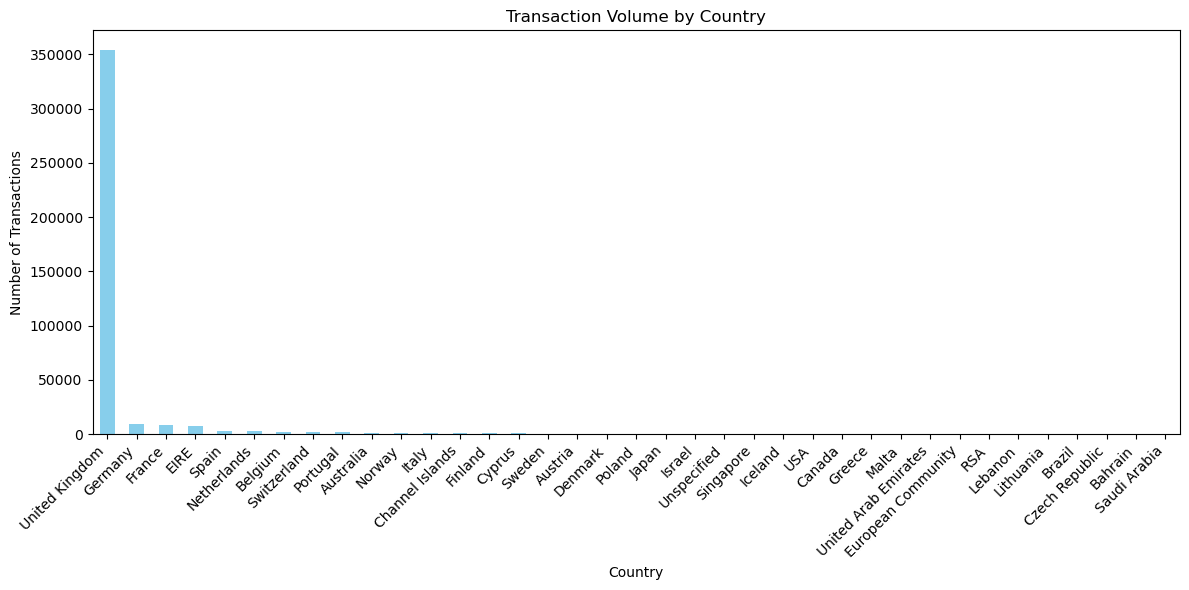

In [26]:
# Analyze transaction volume by country
transaction_volume = ordf['Country'].value_counts()

# Visualize the results with a bar chart
plt.figure(figsize=(12, 6))
transaction_volume.plot(kind='bar', color='skyblue')
plt.title('Transaction Volume by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

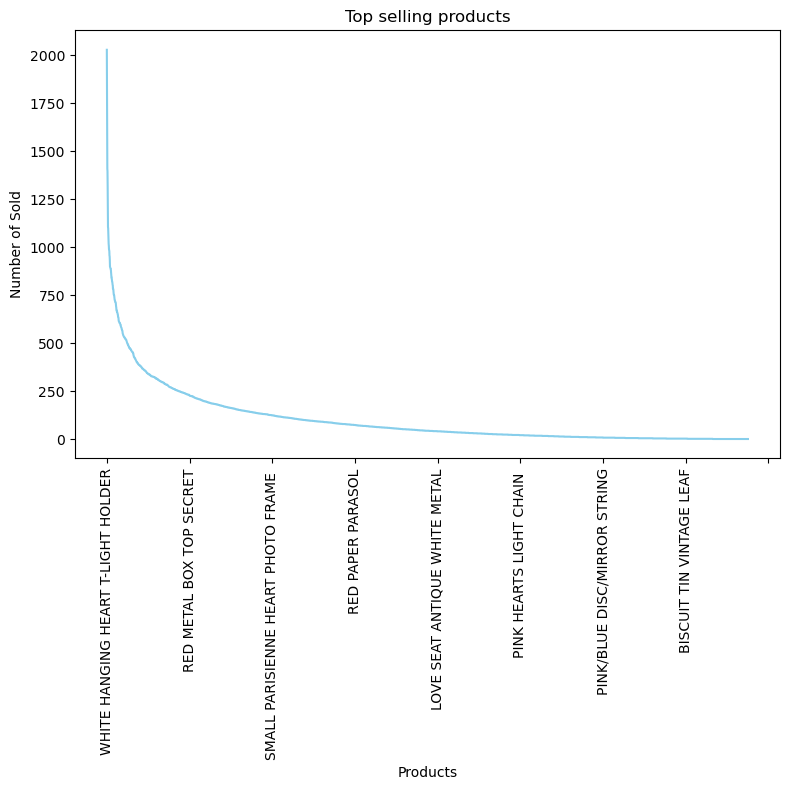

In [27]:
# Analyze transaction volume by country
top_selling = ordf['Description'].value_counts()

# Visualize the results with a bar chart
plt.figure(figsize=(8, 8))
top_selling.plot(kind='line', color='skyblue')
plt.title('Top selling products')
plt.xlabel('Products')
plt.ylabel('Number of Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
ordf['InvoiceDate'] = pd.to_datetime(ordf['InvoiceDate'])

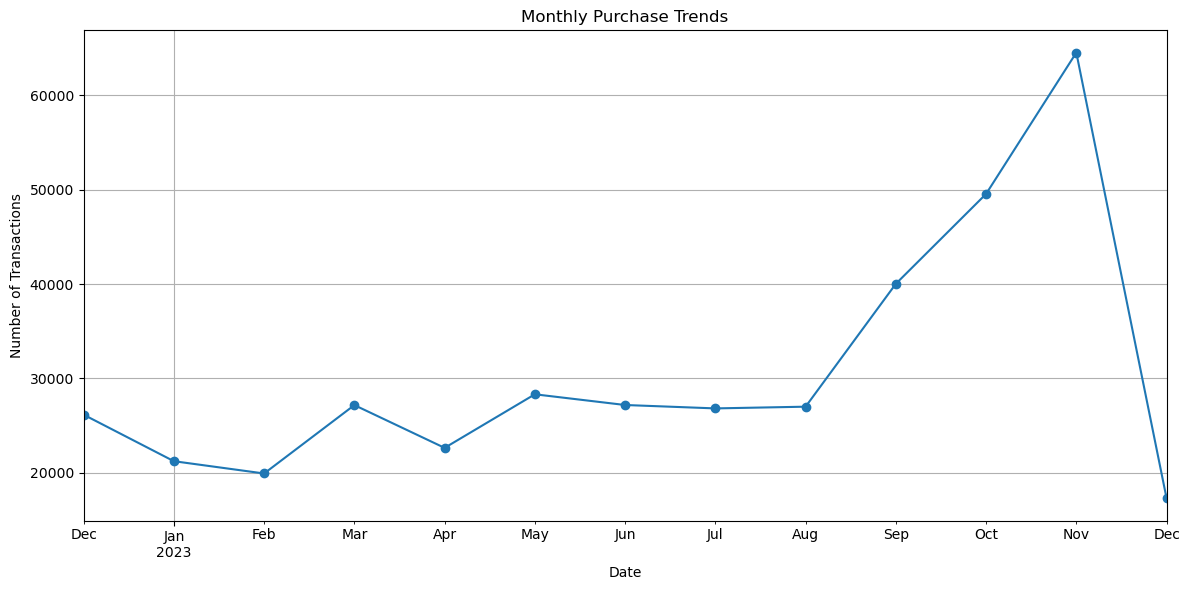

In [29]:
monthly_trends = ordf.set_index('InvoiceDate').resample('ME')['InvoiceNo'].count()

# Step 4: Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Purchase Trends')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

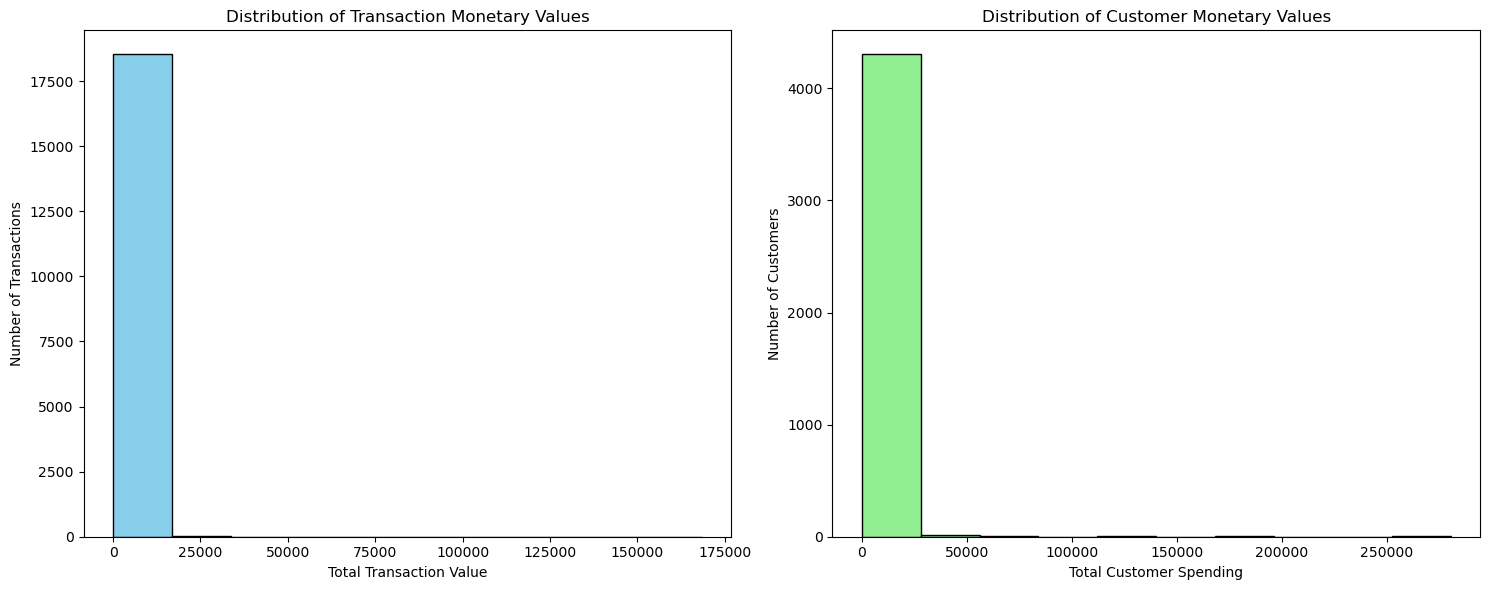

In [30]:
ordf['TotalPrice'] = ordf['Quantity'] * ordf['UnitPrice']

# Aggregate Spending
transaction_monetary = ordf.groupby('InvoiceNo')['TotalPrice'].sum()
customer_monetary = ordf.groupby('CustomerID')['TotalPrice'].sum()

# Visualize the Distribution with Histograms
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Transaction Monetary Values
axes[0].hist(transaction_monetary, bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Transaction Monetary Values')
axes[0].set_xlabel('Total Transaction Value')
axes[0].set_ylabel('Number of Transactions')

# Plot for Customer Monetary Values
axes[1].hist(customer_monetary, bins=10, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Customer Monetary Values')
axes[1].set_xlabel('Total Customer Spending')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

## Step 4: Clustering Methodology

In [31]:
# --- 1. Feature Engineering ---
latest_date = ordf['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm_ord = ordf.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (latest_date - date.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).reset_index()
rfm_ord.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_ord

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,1.04
1,12347.0,2,182,481.21
2,12348.0,75,31,178.71
3,12349.0,19,73,605.10
4,12350.0,310,17,65.30
...,...,...,...,...
4333,18280.0,278,10,47.65
4334,18281.0,181,7,39.36
4335,18282.0,8,12,62.39
4336,18283.0,4,756,1220.93


In [32]:
# --- 2. Standardize/Normalize the RFM values ---
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_ord[['Recency', 'Frequency', 'Monetary']])
rfm_scaled

array([[ 2.33457414, -0.3965777 , -0.32344671],
       [-0.90534032,  0.39464896,  0.22186948],
       [-0.17535959, -0.26543516, -0.12167166],
       ...,
       [-0.8453419 , -0.3484921 , -0.25377316],
       [-0.88534085,  2.9038429 ,  1.06194964],
       [-0.49535114, -0.09494986, -0.20589318]])

In [33]:
# --- 3. & 4. Choose Clustering Algorithm and find optimal clusters ---
sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

print(sse)
print(silhouette_scores)
print(k_range)

[7872.502746863219, 4283.663886105647, 2870.902194902041, 2237.879720420112, 1793.3588259087405, 1528.0050607010508, 1307.490717559602, 1121.0069493387937, 958.9690362461124]
[0.9608752517350759, 0.5883121848966609, 0.6176800878131566, 0.5797859694806842, 0.5258404757184272, 0.4986202673027803, 0.4885214089518672, 0.48928207131122886, 0.434534676652784]
range(2, 11)


In [34]:
# --- 5. Run Clustering and Label Clusters ---
optimal_k = 4 # Based on typical elbow/silhouette method analysis
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_ord['Cluster'] = kmeans_final.fit_predict(rfm_scaled)

# Get average RFM values for each cluster to label them
rfm_cluster_avg = rfm_ord.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

# Sort clusters to match labels logically
# 'High-Value' (Low R, High F, High M), 'At-Risk' (High R, Low F, Low M), etc.
cluster_labels = {
    0: 'Occasional',
    1: 'Regular',
    2: 'At-Risk',
    3: 'High-Value'
}
rfm_ord['Segment'] = rfm_ord['Cluster'].map(cluster_labels)
rfm_ord

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,1.04,3,High-Value
1,12347.0,2,182,481.21,1,Regular
2,12348.0,75,31,178.71,1,Regular
3,12349.0,19,73,605.10,1,Regular
4,12350.0,310,17,65.30,3,High-Value
...,...,...,...,...,...,...
4333,18280.0,278,10,47.65,3,High-Value
4334,18281.0,181,7,39.36,3,High-Value
4335,18282.0,8,12,62.39,1,Regular
4336,18283.0,4,756,1220.93,0,Occasional


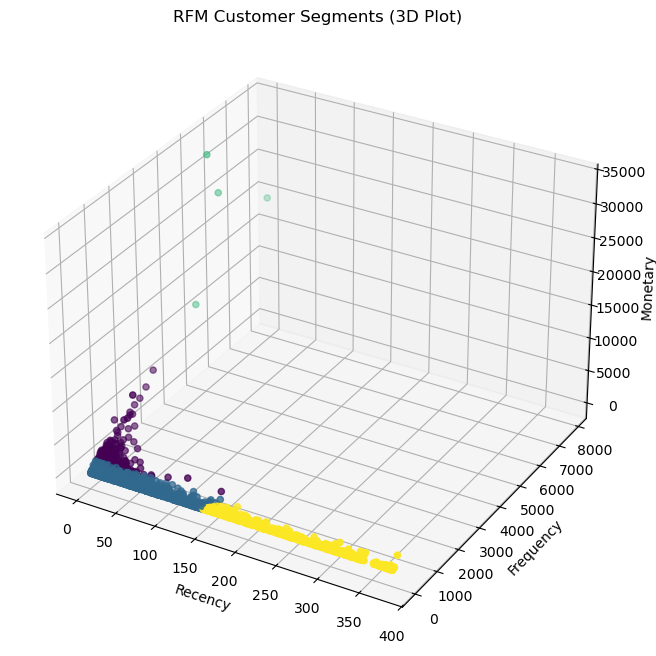

In [35]:
# --- 6. Visualize the clusters using a 3D plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_ord['Recency'], rfm_ord['Frequency'], rfm_ord['Monetary'], c=rfm_ord['Cluster'], cmap='viridis', s=20)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Customer Segments (3D Plot)')
plt.show()

In [36]:
# --- 7. Save the best performing model ---
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_final, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Recommendation system approach

In [37]:
ordf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60


In [38]:
# Create a user-item matrix where customers are rows and products are columns
user_item_matrix = ordf.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)

# Compute cosine similarity between products
product_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix.T),
                                         index=user_item_matrix.columns,
                                         columns=user_item_matrix.columns)

In [39]:
# The recommendation function
def get_similar_products(product_name, similarity_matrix, top_n=5):
    """
    Returns the top N most similar products for a given product name.
    """
    if product_name not in similarity_matrix.index:
        return f"Product '{product_name}' not found."
    
    # Get the similarity scores for the product and sort them
    product_scores = similarity_matrix[product_name].sort_values(ascending=False)
    
    # Exclude the product itself and return the top N
    similar_products = product_scores.drop(product_name).head(top_n)
    
    return similar_products

In [40]:
# Usage:
product_to_recommend = 'WHITE HANGING HEART T-LIGHT HOLDER'  
recommendations = get_similar_products(product_to_recommend, product_similarity_matrix)

print(f"Top 5 products similar to '{product_to_recommend}':")
print(recommendations)

Top 5 products similar to 'WHITE HANGING HEART T-LIGHT HOLDER':
Description
GIN + TONIC DIET METAL SIGN         0.750410
RED HANGING HEART T-LIGHT HOLDER    0.658719
WASHROOM METAL SIGN                 0.643500
LAUNDRY 15C METAL SIGN              0.642206
GREEN VINTAGE SPOT BEAKER           0.631461
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64


## Streamlit App Features

In [41]:
%%writefile Final_Project4.py
import streamlit as st
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pickle # Used for simulating model loading

# --- 0. Data and Product List Definitions ---

# The specific list of products provided by the user for easy selection
SELECTION_PRODUCTS = [
    '--- Select a Product ---', # Placeholder for initial selection
    'WHITE HANGING HEART T-LIGHT HOLDER',
    'RED METAL BOX TOP SECRET',
    'SMALL PARISIENNE HEART PHOTO FRAME',
    'RED PAPER PARASOL',
    'LOVE SEAT ANTIQUE WHITE METAL',
    'PINK HEARTS LIGHT CHAIN',
    'PINK/BLUE DISC/MIRROR STRING',
    'BISCUIT TIN VINTAGE LEAF'
]

# Map cluster labels to meaningful segment names (Based on standard RFM interpretation)
CLUSTER_LABELS = {
    0: 'High-Value Customer', # Low Recency, High Frequency, High Monetary
    1: 'At-Risk Customer',    # High Recency, Low Frequency, Low Monetary
    2: 'Regular Customer',    # Medium values
    3: 'Occasional Shopper'   # Low Frequency, Low Monetary, older Recency
}

# --- Shared Data Loading and Model Functions ---

@st.cache_data
def load_and_prepare_data():
    # Load your actual DataFrame here. For demonstration, we'll use a sample.
    data = pd.read_csv('online_retail.csv')
    df = pd.DataFrame(data)

    # Clean the data by removing cancelled invoices and non-positive quantity/unit price
    df_clean = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
    df_clean = df_clean[df_clean['Quantity'] > 0]

    # Handle null values by removing rows with missing Description or CustomerID
    df_clean.dropna(subset=['Description', 'CustomerID'], inplace=True)

    # Create the user-item matrix
    user_item_matrix = df_clean.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)

    # Compute the product-to-product similarity matrix
    product_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix.T),
                                             index=user_item_matrix.columns,
                                             columns=user_item_matrix.columns)
    
    return product_similarity_matrix

@st.cache_resource
def load_rfm_assets():
    """
    Attempts to load the trained K-Means model and StandardScaler from pickle files.
    """
    model_path = 'kmeans_model.pkl'
    scaler_path = 'scaler.pkl'
    
    try:
        # Load the K-Means Model
        with open(model_path, 'rb') as f:
            kmeans_model = pickle.load(f)
        
        # Load the StandardScaler
        with open(scaler_path, 'rb') as f:
            scaler = pickle.load(f)
            
        return kmeans_model, scaler
        
    except FileNotFoundError:
        # Return None and the specific error for graceful handling in the page function
        return None, f"Model files not found. Please ensure both '{model_path}' and '{scaler_path}' are uploaded and accessible."
    except Exception as e:
        return None, f"An error occurred during model loading: {e}"

# A function to get recommendations based on the similarity matrix
def get_similar_products(product_name, similarity_matrix, top_n=5):
    """Retrieves the top N most similar products based on cosine similarity."""
    if product_name not in similarity_matrix.index:
        return f"Product '{product_name}' not found in the sales history used for modeling."
    
    product_scores = similarity_matrix[product_name].sort_values(ascending=False)
    similar_products = product_scores.drop(product_name, errors='ignore').head(top_n)
    
    return similar_products

# --- Page Functions ---

def home_page():
    st.title("Welcome to the E-commerce Analytics App")
    st.markdown("""
        This application provides an overview of your sales data and offers two key analytical tools:
        
        * **Clustering:** Segment your customers based on their purchasing behavior (RFM Analysis).
        * **Recommendation:** Get product recommendations based on item-based collaborative filtering.
        
        Use the sidebar to navigate between modules.
    """)
    st.image("https://placehold.co/800x200/4CAF50/white?text=E-commerce+Dashboard+Overview", use_column_width=True)

def clustering_page():
    st.title("📊 Customer Segmentation Module")
    st.markdown("---")
    st.markdown("Enter a customer's purchasing metrics to predict their segment (Recency, Frequency, Monetary).")

    # Load the model assets once
    kmeans_model, scaler = load_rfm_assets()

    # Create the three number inputs using st.columns for better alignment
    col1, col2, col3 = st.columns(3)
    
    with col1:
        recency = st.number_input("Recency (days since last purchase)", min_value=1, max_value=730, value=30, step=1)
    
    with col2:
        frequency = st.number_input("Frequency (number of purchases)", min_value=1, max_value=100, value=5, step=1)
    
    with col3:
        monetary = st.number_input("Monetary (total spend)", min_value=10.0, max_value=50000.0, value=500.0, step=10.0)

    st.markdown("---")

    if st.button("Predict Segment", type="primary"):
        with st.spinner("Calculating Customer Segment..."):
            
            # 1. Combine inputs into a DataFrame/Array
            new_customer_data = np.array([[recency, frequency, monetary]])
            
            # 2. Scale the data using the trained scaler
            scaled_data = scaler.transform(new_customer_data)
            
            # 3. Predict the cluster ID
            cluster_id = kmeans_model.predict(scaled_data)[0]
            
            # 4. Map the ID to the label
            segment_label = CLUSTER_LABELS.get(cluster_id, "Unknown Segment")

            st.success("Prediction Complete!")
            
            st.markdown(f"""
                <div style="
                    border: 2px solid #ff4b4b; 
                    padding: 20px; 
                    margin-top: 20px;
                    border-radius: 10px; 
                    background-color: #ffeaea;
                    text-align: center;
                ">
                    <h3 style='margin: 0; color: #ff4b4b;'>Predicted Cluster ID: {cluster_id}</h3>
                    <h2 style='margin: 5px 0 0 0; color: #0e1117;'>Segment: {segment_label}</h2>
                </div>
            """, unsafe_allow_html=True)

def recommendation_page():
    st.title('🛒 Item-Based Product Recommender')
    st.markdown('***')

    # Use st.selectbox for easy selection of known products
    product_name_select = st.selectbox(
        'Select a Product for Recommendations', 
        options=SELECTION_PRODUCTS,
        index=0 # Default to the placeholder option
    )

    if st.button('Get Recommendations', use_container_width=True, type="primary"):
        if product_name_select == SELECTION_PRODUCTS[0]:
            st.warning('Please select a valid product name from the list to get recommendations.')
        else:
            with st.spinner(f'Finding similar products for "{product_name_select}"...'):
                # Load data and similarity matrix
                try:
                    product_similarity_matrix = load_and_prepare_data()
                    recommendations = get_similar_products(product_name_select, product_similarity_matrix)
                except Exception as e:
                    st.error(f"An error occurred during data processing: {e}")
                    recommendations = f"Failed to generate recommendations due to data error."
            
            st.subheader(f'Top 5 Recommendations for: *{product_name_select}*')
            
            # Display the results
            if isinstance(recommendations, str):
                st.warning(recommendations)
            else:
                # Styled card view using HTML/Markdown
                for i, item in enumerate(recommendations.index):
                    st.markdown(
                        f"""
                        <div style="
                            border-left: 5px solid #ff4b4b; 
                            padding: 10px; 
                            margin-bottom: 10px; 
                            border-radius: 5px; 
                            background-color: #f0f2f6;
                            box-shadow: 2px 2px 5px rgba(0,0,0,0.1);
                        ">
                            <h4 style='margin: 0; color: #0e1117;'>{i+1}. {item}</h4>
                            <p style='margin: 0; font-size: 0.9em; color: #555;'>Similarity Score: <b>{recommendations.iloc[i]:.4f}</b></p>
                        </div>
                        """, 
                        unsafe_allow_html=True
                    )
# --- Main App Logic with Sidebar Navigation ---

st.set_page_config(page_title="E-commerce Analytics App", layout="centered", initial_sidebar_state="expanded")

# Initialize session state for navigation
if 'page' not in st.session_state:
    st.session_state['page'] = 'Clustering' # Set default page to the new Clustering module

# --- Sidebar Navigation ---
with st.sidebar:
    st.title("Navigation")
    
    # Custom button-based navigation for visual fidelity
    
    if st.button("🖥️ Home", key="nav_home", use_container_width=True, type="secondary" if st.session_state['page'] != 'Home' else "primary"):
        st.session_state['page'] = 'Home'

    if st.button("📅 Clustering", key="nav_cluster", use_container_width=True, type="secondary" if st.session_state['page'] != 'Clustering' else "primary"):
        st.session_state['page'] = 'Clustering'

    if st.button("📕 Recommendation", key="nav_recommendation", use_container_width=True, type="secondary" if st.session_state['page'] != 'Recommendation' else "primary"):
        st.session_state['page'] = 'Recommendation'

# --- Display Content Based on Selected Page ---
if st.session_state['page'] == 'Home':
    home_page()
elif st.session_state['page'] == 'Clustering':
    clustering_page()
elif st.session_state['page'] == 'Recommendation':
    recommendation_page()

Writing Final_Project4.py
